In [1]:
import time
import numpy as np
from sklearn import metrics
import pycaret
from pycaret.datasets import get_data
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment

from sktime.utils.plotting import plot_series

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f77cc8ce610>)

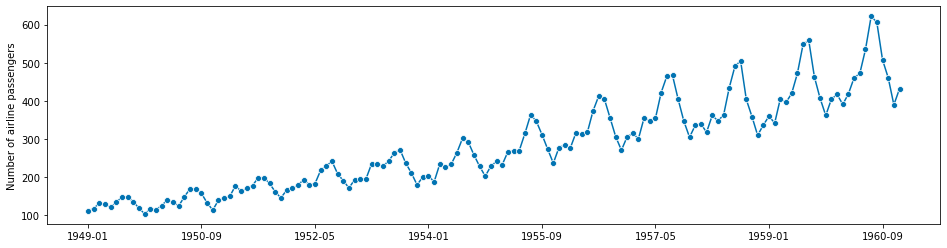

In [2]:
y = get_data('airline', verbose=False)
plot_series(y)

In [3]:
fh = np.arange(1,13)
fold = 3

In [4]:
# Available Models
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=12)
exp.models()

,Description,Value
0,session_id,1768
1,Original Data,"(144, 1)"
2,Missing Values,False
3,Transformed Train Set,"(132,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,TimeSeriesSplit
6,Fold Number,10
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


,Name,Reference,Turbo
ID,,,
naive,Naive,sktime.forecasting.naive.NaiveForecaster,True
poly_trend,PolyTrend,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
exp_smooth,ExponentialSmoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
auto_ets,AutoETS,sktime.forecasting.ets.AutoETS,True
theta,Theta,sktime.forecasting.theta.ThetaForecaster,True
tbats,TBATS,sktime.forecasting.tbats.TBATS,True
bats,BATS,sktime.forecasting.bats.BATS,True
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsDt,True


## Sliding Window Splitter

In [5]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='slidingwindow')
model = exp.create_model("arima")

,smape,mape,mae,rmse
0,0.2544,0.2172,86.4672,10986.2059
1,0.1969,0.1705,72.3623,9262.3184
2,0.2978,0.2508,115.1556,18344.7882
Mean,0.2497,0.2128,91.3284,12864.4375
SD,0.0413,0.0329,17.8053,3938.5809


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f77ca6e2d10>)

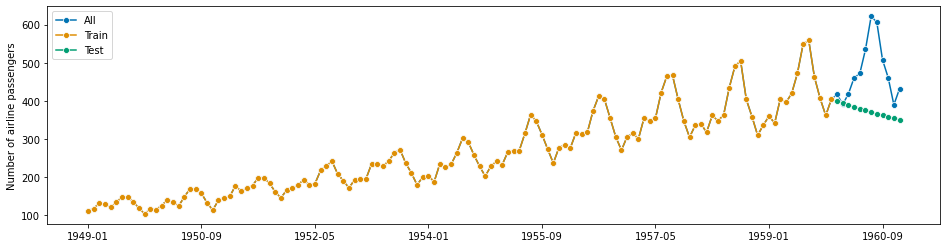

In [6]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## Expanding Window Splitter

In [7]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expandingwindow')
model = exp.create_model("arima")

,smape,mape,mae,rmse
0,0.2544,0.2172,86.4672,10986.2059
1,0.1931,0.1675,71.1742,9049.5815
2,0.2962,0.2496,114.6292,18211.8563
Mean,0.2479,0.2114,90.7569,12749.2146
SD,0.0424,0.0338,17.9979,3942.7545


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f77c618ea50>)

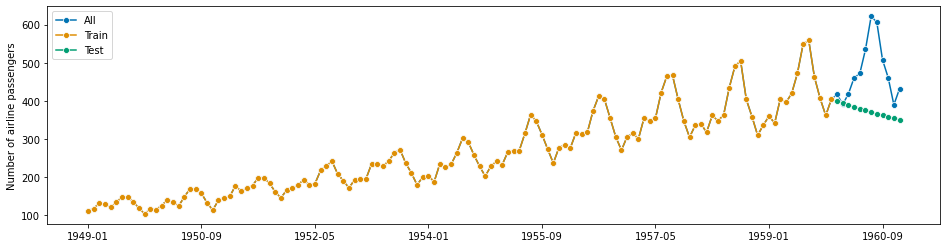

In [8]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

# Model types

## Common Setup

In [9]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expandingwindow', session_id=42)

,Description,Value
0,session_id,42
1,Original Data,"(144, 1)"
2,Missing Values,False
3,Transformed Train Set,"(132,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


## Naive

,smape,mape,mae,rmse
0,0.1138,0.1076,40.1667,1720.1667
1,0.0322,0.0314,12.5833,289.4167
2,0.1176,0.1106,47.3333,2426.0000
Mean,0.0879,0.0832,33.3611,1478.5278
SD,0.0394,0.0367,14.9806,888.8341


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7808b30690>)

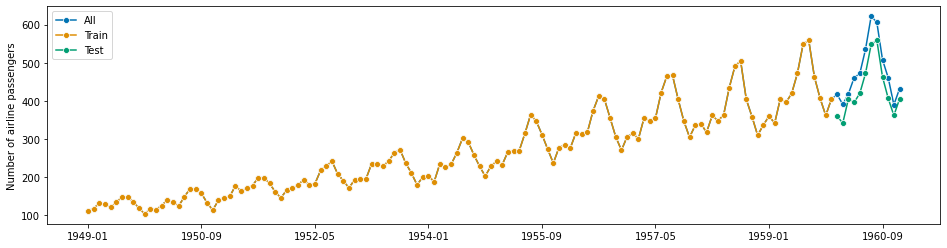

In [10]:
model = exp.create_model("naive")
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [11]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.1138,0.1076,40.1667,1720.1667
1,0.0322,0.0314,12.5833,289.4167
2,0.1176,0.1106,47.3333,2426.0000
Mean,0.0879,0.0832,33.3611,1478.5278
SD,0.0394,0.0367,14.9806,888.8341


NaiveForecaster(sp=12, strategy='last', window_length=None)
NaiveForecaster(sp=12, strategy='last', window_length=None)


In [12]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.1138,0.1076,40.1667,1720.1667
1,0.0322,0.0314,12.5833,289.4167
2,0.1176,0.1106,47.3333,2426.0000
Mean,0.0879,0.0832,33.3611,1478.5278
SD,0.0394,0.0367,14.9806,888.8341


NaiveForecaster(sp=12, strategy='last', window_length=None)
NaiveForecaster(sp=12, strategy='last', window_length=None)


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7808a71bd0>)

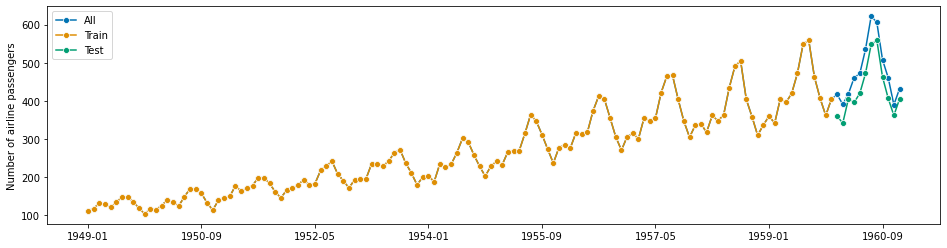

In [13]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = tuned_model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## Polynomial Trend

,smape,mape,mae,rmse
0,0.1226,0.1140,45.8148,3789.0261
1,0.1278,0.1275,49.9929,3759.3858
2,0.1144,0.1096,50.0825,4545.5664
Mean,0.1216,0.1170,48.6301,4031.3261
SD,0.0055,0.0076,1.9910,363.8241


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f78089d3690>)

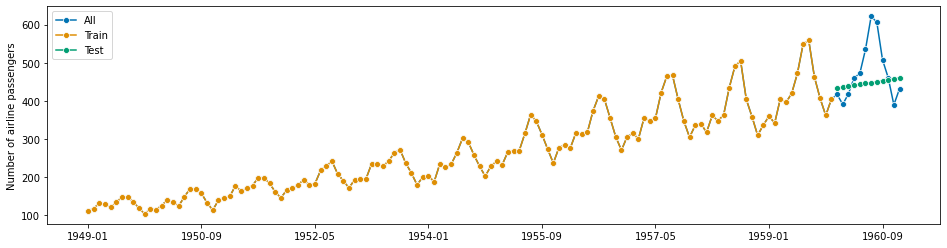

In [14]:
model = exp.create_model("poly_trend")
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [15]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.1226,0.1140,45.8148,3789.0261
1,0.1278,0.1275,49.9929,3759.3858
2,0.1144,0.1096,50.0825,4545.5664
Mean,0.1216,0.1170,48.6301,4031.3261
SD,0.0055,0.0076,1.9910,363.8241


PolynomialTrendForecaster(degree=1, regressor=None, with_intercept=True)
PolynomialTrendForecaster(degree=1, regressor=None, with_intercept=True)


In [16]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.1215,0.1232,45.6407,3009.1181
1,0.1651,0.1792,65.0246,5126.1853
2,0.1146,0.1110,50.1574,4417.8619
Mean,0.1337,0.1378,53.6076,4184.3884
SD,0.0223,0.0297,8.2810,879.9150


PolynomialTrendForecaster(degree=1, regressor=None, with_intercept=True)
PolynomialTrendForecaster(degree=3, regressor=None, with_intercept=True)


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7808970350>)

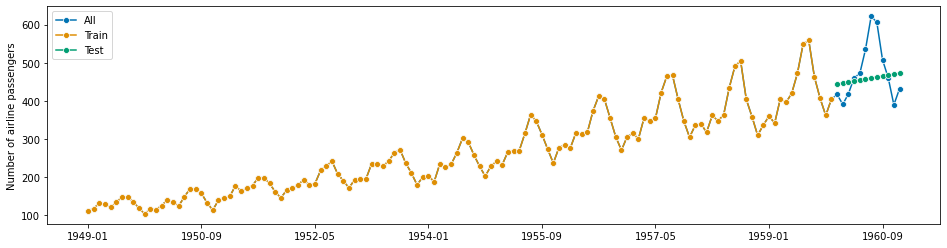

In [17]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = tuned_model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## ARIMA

,smape,mape,mae,rmse
0,0.2544,0.2172,86.4672,10986.2059
1,0.1931,0.1675,71.1742,9049.5815
2,0.2962,0.2496,114.6292,18211.8563
Mean,0.2479,0.2114,90.7569,12749.2146
SD,0.0424,0.0338,17.9979,3942.7545


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f780888cd90>)

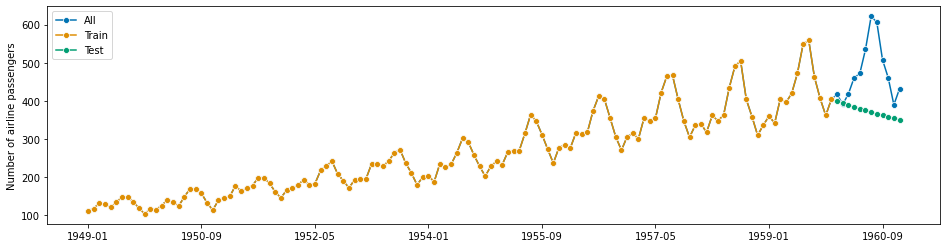

In [18]:
model = exp.create_model("arima")
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [19]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.2767,0.2401,91.6004,9823.6668
1,0.1797,0.1623,65.5746,5777.2750
2,0.3155,0.2685,118.6964,16425.3251
Mean,0.2573,0.2236,91.9571,10675.4223
SD,0.0571,0.0449,21.6883,4388.5729


ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)
ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 1, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)


In [20]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0339,0.0331,13.2626,277.8525
1,0.0513,0.0530,19.1686,455.3259
2,0.0506,0.0491,21.1925,551.0621
Mean,0.0453,0.0451,17.8746,428.0802
SD,0.0080,0.0086,3.3642,113.1890


ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)
ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(1, 1, 0, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f78088420d0>)

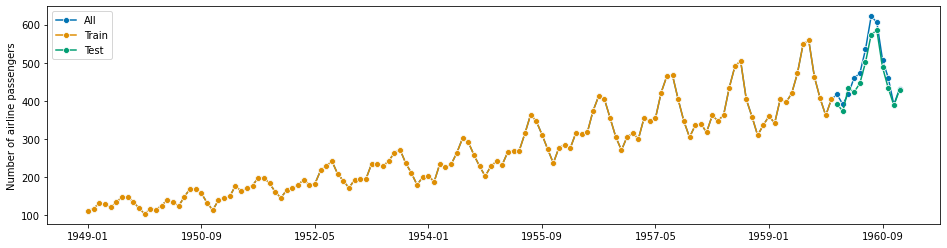

In [21]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = tuned_model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## Exponential Smoothing

,smape,mape,mae,rmse
0,0.1142,0.1060,42.2959,2701.4593
1,0.0500,0.0505,19.1496,477.6734
2,0.0874,0.0826,35.7890,1681.3442
Mean,0.0839,0.0797,32.4115,1620.1590
SD,0.0263,0.0228,9.7465,908.8871


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7808716690>)

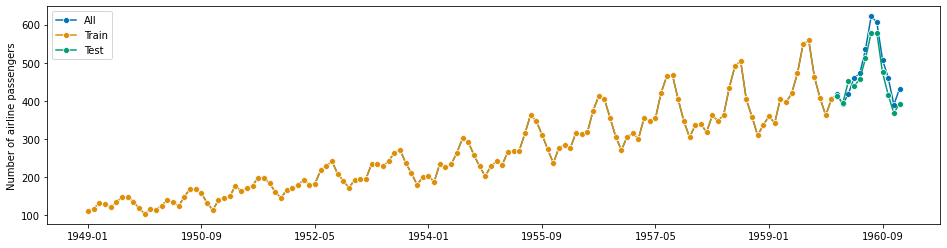

In [22]:
model = exp.create_model("exp_smooth")
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [23]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0273,0.0272,10.5620,182.1899
1,0.0704,0.0738,26.2573,903.9160
2,0.0265,0.0261,11.2644,179.8603
Mean,0.0414,0.0424,16.0279,421.9887
SD,0.0205,0.0222,7.2390,340.7754


ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend=None, use_boxcox=None)
ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend='add', use_boxcox=True)


In [24]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0273,0.0272,10.5620,182.1899
1,0.0704,0.0738,26.2573,903.9160
2,0.0265,0.0261,11.2644,179.8603
Mean,0.0414,0.0424,16.0279,421.9887
SD,0.0205,0.0222,7.2390,340.7754


ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend=None, use_boxcox=None)
ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='additive',
                     sp=None, trend='additive', use_boxcox=True)


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7808ba6a10>)

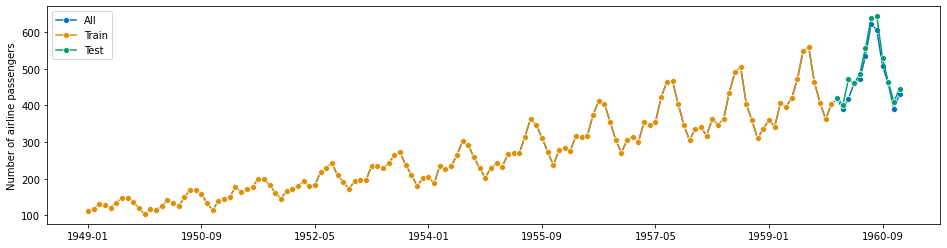

In [25]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = tuned_model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## Theta Model

,smape,mape,mae,rmse
0,0.0619,0.0594,23.3572,817.7919
1,0.0401,0.0401,16.0904,438.9525
2,0.1080,0.1013,45.5099,2708.5057
Mean,0.0700,0.0670,28.3192,1321.7500
SD,0.0283,0.0255,12.5124,992.7062


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f78085cc750>)

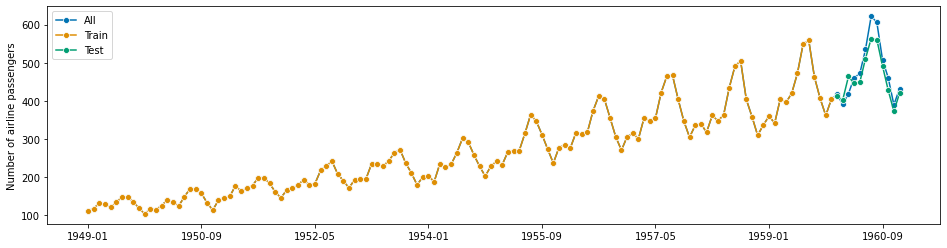

In [26]:
model = exp.create_model("theta")
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [27]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0592,0.0570,22.3655,776.5132
1,0.0378,0.0378,15.0918,398.2215
2,0.0884,0.0832,37.8295,2153.9634
Mean,0.0618,0.0593,25.0956,1109.5660
SD,0.0207,0.0186,9.4813,754.4758


ThetaForecaster(deseasonalize=True, initial_level=None, sp=12)
ThetaForecaster(deseasonalize=True, initial_level=None, sp=24)


In [28]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0592,0.0570,22.3655,776.5132
1,0.0378,0.0378,15.0918,398.2215
2,0.0884,0.0832,37.8295,2153.9634
Mean,0.0618,0.0593,25.0956,1109.5660
SD,0.0207,0.0186,9.4813,754.4758


ThetaForecaster(deseasonalize=True, initial_level=None, sp=12)
ThetaForecaster(deseasonalize=True, initial_level=None, sp=24)


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f78085694d0>)

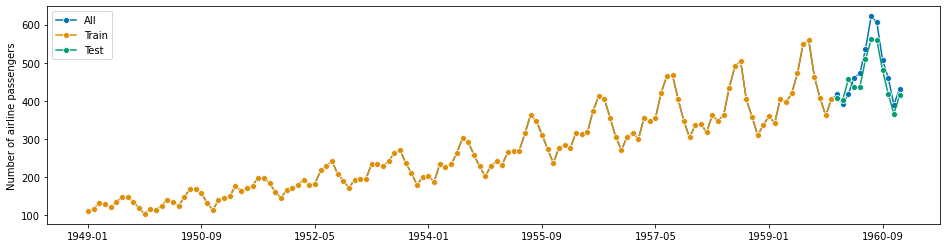

In [29]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = tuned_model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## AutoETS

,smape,mape,mae,rmse
0,0.1142,0.1060,42.2938,2701.2433
1,0.0486,0.0491,18.6732,474.0367
2,0.0889,0.0839,36.2976,1747.4130
Mean,0.0839,0.0796,32.4215,1640.8976
SD,0.0270,0.0234,10.0250,912.3674


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7808491650>)

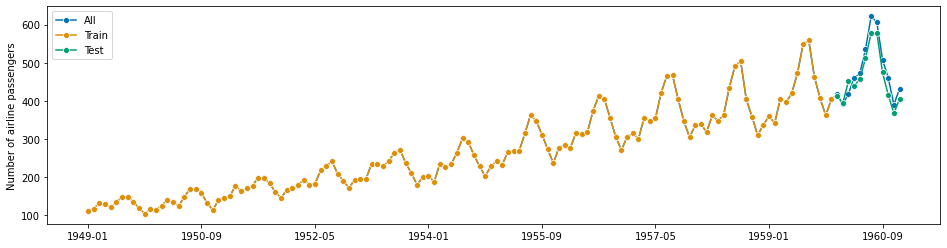

In [30]:
model = exp.create_model("auto_ets")
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [31]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0376,0.0366,14.5615,352.4886
1,0.0446,0.0458,16.7827,372.8826
2,0.0512,0.0495,20.8904,549.0250
Mean,0.0445,0.0440,17.4115,424.7988
SD,0.0055,0.0054,2.6218,88.2349


AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal='add', sp=12,
        start_params=None, trend=None)
AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal='mul', sp=12,
        start_params=None, trend='add')


In [32]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0376,0.0366,14.5615,352.4886
1,0.0446,0.0458,16.7827,372.8826
2,0.0512,0.0495,20.8904,549.0250
Mean,0.0445,0.0440,17.4115,424.7988
SD,0.0055,0.0054,2.6218,88.2349


AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal='add', sp=12,
        start_params=None, trend=None)
AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal='mul', sp=12,
        start_params=None, trend='add')


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f77ef9d16d0>)

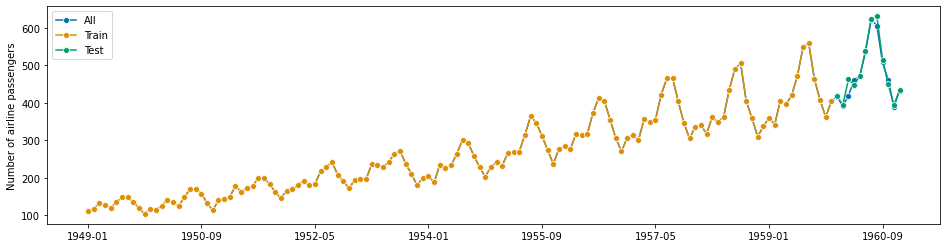

In [33]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = tuned_model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## TBATS

,smape,mape,mae,rmse
0,0.0279,0.0276,10.9542,213.5547
1,0.0645,0.0673,24.0440,762.8867
2,0.0854,0.0809,36.6166,1871.4164
Mean,0.0593,0.0586,23.8716,949.2859
SD,0.0238,0.0226,10.4773,689.5336


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f77ef903450>)

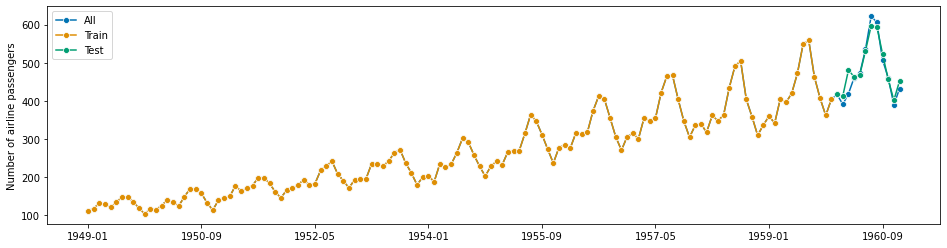

In [34]:
model = exp.create_model("tbats")
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [35]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0279,0.0276,10.9542,213.5547
1,0.0645,0.0673,24.0440,762.8867
2,0.0854,0.0809,36.6166,1871.4164
Mean,0.0593,0.0586,23.8716,949.2859
SD,0.0238,0.0226,10.4773,689.5336


TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=True, sp=12, use_arma_errors=True,
      use_box_cox=None, use_damped_trend=None, use_trend=None)
TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=True, sp=12, use_arma_errors=True,
      use_box_cox=True, use_damped_trend=False, use_trend=True)


In [36]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0279,0.0276,10.9542,213.5547
1,0.0645,0.0673,24.0440,762.8867
2,0.0854,0.0809,36.6166,1871.4164
Mean,0.0593,0.0586,23.8716,949.2859
SD,0.0238,0.0226,10.4773,689.5336


TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=True, sp=12, use_arma_errors=True,
      use_box_cox=None, use_damped_trend=None, use_trend=None)
TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=True, sp=12, use_arma_errors=True,
      use_box_cox=True, use_damped_trend=False, use_trend=True)


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f77ef84bc50>)

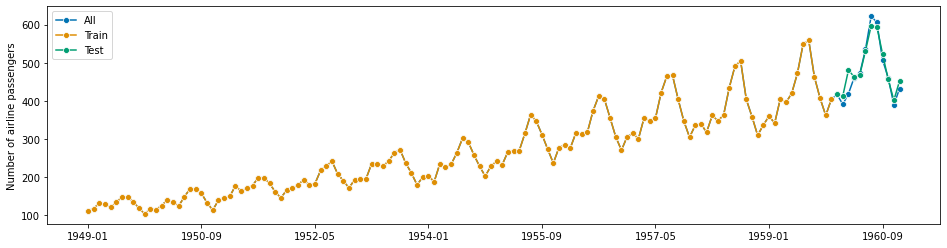

In [37]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = tuned_model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## BATS

,smape,mape,mae,rmse
0,0.0298,0.0295,11.5918,216.5141
1,0.0470,0.0463,18.9803,614.3640
2,0.1286,0.1194,53.2904,3616.4892
Mean,0.0685,0.0651,27.9542,1482.4558
SD,0.0431,0.0390,18.1676,1517.7055


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f77ef6d1c50>)

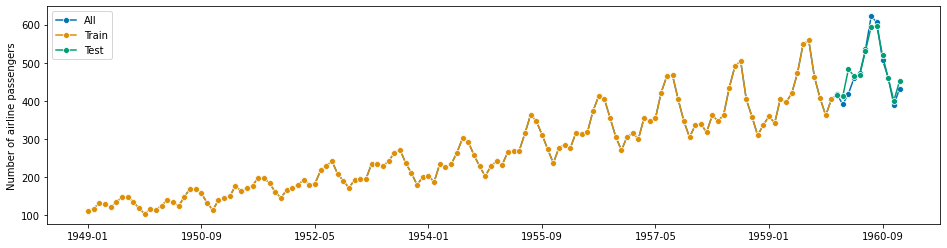

In [38]:
model = exp.create_model("bats")
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [39]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0313,0.0309,12.1947,238.5949
1,0.0469,0.0467,18.6928,568.0577
2,0.0958,0.0902,40.7065,2285.1704
Mean,0.0580,0.0559,23.8647,1030.6077
SD,0.0275,0.0251,12.2009,897.2485


BATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
     n_jobs=None, show_warnings=True, sp=12, use_arma_errors=True,
     use_box_cox=None, use_damped_trend=None, use_trend=None)
BATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
     n_jobs=None, show_warnings=True, sp=12, use_arma_errors=True,
     use_box_cox=True, use_damped_trend=True, use_trend=True)


In [40]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0313,0.0309,12.1947,238.5949
1,0.0469,0.0467,18.6928,568.0577
2,0.0958,0.0902,40.7065,2285.1704
Mean,0.0580,0.0559,23.8647,1030.6077
SD,0.0275,0.0251,12.2009,897.2485


BATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
     n_jobs=None, show_warnings=True, sp=12, use_arma_errors=True,
     use_box_cox=None, use_damped_trend=None, use_trend=None)
BATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
     n_jobs=None, show_warnings=True, sp=12, use_arma_errors=True,
     use_box_cox=True, use_damped_trend=True, use_trend=True)


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f77ef6a3890>)

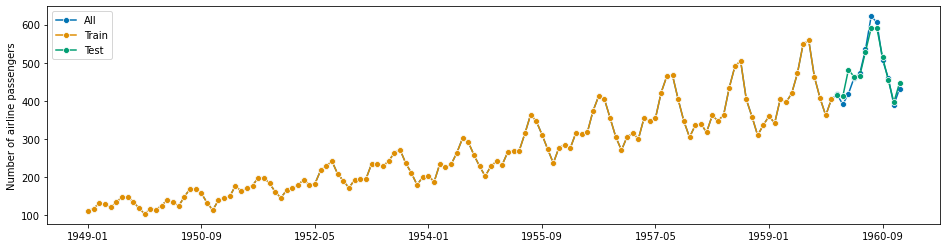

In [41]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = tuned_model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## Random Forest (with internal conditional deseasonalize and detrending)

,smape,mape,mae,rmse
0,0.0721,0.0678,28.0638,1611.5346
1,0.0748,0.0738,29.7063,1450.1777
2,0.0493,0.0470,22.8056,1290.5687
Mean,0.0654,0.0629,26.8586,1450.7603
SD,0.0115,0.0115,2.9433,131.0344


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f77ef69f350>)

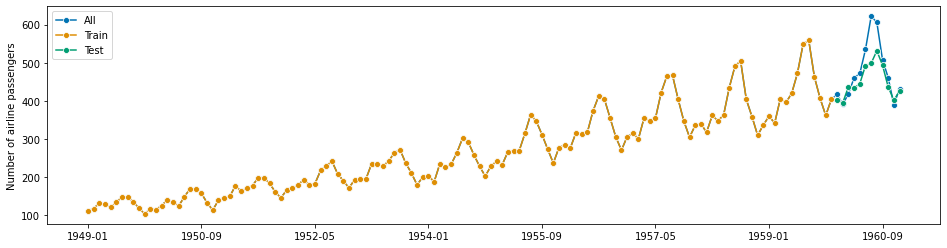

In [42]:
model = exp.create_model("rf_cds_dt")
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [43]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0667,0.0631,26.0606,1308.6896
1,0.0559,0.0563,21.7971,727.7585
2,0.0409,0.0395,18.9232,869.8504
Mean,0.0545,0.0530,22.2603,968.7662
SD,0.0106,0.0099,2.9322,247.2630


BaseCdsDt(degree=1, deseasonal_model='additive',
          regressor=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                          criterion='mse', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=100, n_jobs=-1,
                                          oob_score=False, random_state=42,
                                          verbose=0, warm_start=False),
          sp=1, window_length=10)
BaseCdsDt(degree=1, deseasonal_model='additive',
          regressor=Rand

In [44]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0521,0.0502,20.1918,682.5538
1,0.0482,0.0496,18.5111,509.3313
2,0.0405,0.0396,18.1008,517.7899
Mean,0.0470,0.0465,18.9346,569.8917
SD,0.0048,0.0049,0.9046,79.7390


BaseCdsDt(degree=1, deseasonal_model='additive',
          regressor=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                          criterion='mse', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=100, n_jobs=-1,
                                          oob_score=False, random_state=42,
                                          verbose=0, warm_start=False),
          sp=1, window_length=10)
BaseCdsDt(degree=1, deseasonal_model='multiplicative',
          regresso

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f77ef635fd0>)

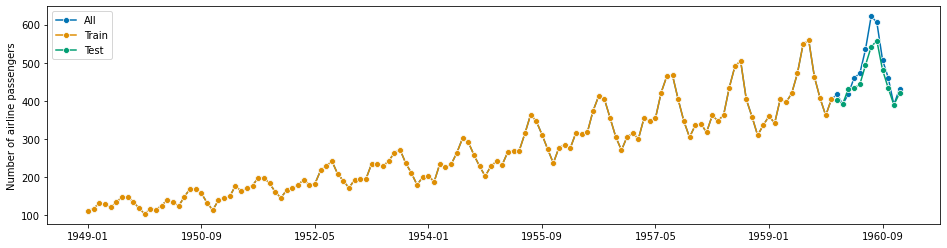

In [45]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = tuned_model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## Tune Models

Shown above

## Blend Models

In [46]:
arima_model = exp.create_model("arima")
naive_model = exp.create_model("naive")

,smape,mape,mae,rmse
0,0.1138,0.1076,40.1667,1720.1667
1,0.0322,0.0314,12.5833,289.4167
2,0.1176,0.1106,47.3333,2426.0000
Mean,0.0879,0.0832,33.3611,1478.5278
SD,0.0394,0.0367,14.9806,888.8341


In [47]:
mean_blender = exp.blend_models([arima_model, naive_model], method='mean')

,smape,mape,mae,rmse
0,0.1796,0.1624,63.3169,5202.6704
1,0.1047,0.0969,41.0937,2976.0921
2,0.2008,0.1801,80.9813,8142.2703
Mean,0.1617,0.1465,61.7973,5440.3443
SD,0.0412,0.0358,16.3195,2115.7687


In [48]:
median_blender = exp.blend_models([arima_model, naive_model], method='median')

,smape,mape,mae,rmse
0,0.1796,0.1624,63.3169,5202.6704
1,0.1047,0.0969,41.0937,2976.0921
2,0.2008,0.1801,80.9813,8142.2703
Mean,0.1617,0.1465,61.7973,5440.3443
SD,0.0412,0.0358,16.3195,2115.7687


In [49]:
voting_blender = exp.blend_models([arima_model, naive_model], method='voting', weights=[1.2, 0.7])

,smape,mape,mae,rmse
0,0.1983,0.1768,69.4091,6501.5617
1,0.1255,0.1142,48.5964,4246.0173
2,0.2246,0.1984,89.8360,10370.0948
Mean,0.1828,0.1631,69.2805,7039.2246
SD,0.0419,0.0357,16.8362,2528.8854


## Compare Models

In [50]:
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expandingwindow')

best_baseline_models = exp.compare_models(fold=fold, sort='smape', n_select=3)
best_baseline_models

,Model,smape,mape,mae,rmse,TT (Sec)
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.0529,0.0518,21.7990,861.0526,0.0367
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.0538,0.0526,22.0643,856.8532,0.5833
tbats,TBATS,0.0593,0.0586,23.8716,949.2859,30.9167
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.0641,0.0617,25.8293,1290.4445,0.4500
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.0649,0.0623,26.3755,1348.8173,0.6133
bats,BATS,0.0685,0.0651,27.9542,1482.4558,17.7633
theta,Theta,0.0700,0.0670,28.3192,1321.7500,0.0167
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.0708,0.0682,28.6993,1515.1429,0.1133
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0722,0.0698,28.7738,1339.5259,0.0433
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0722,0.0694,29.3617,1477.7939,0.0633


[BaseCdsDt(degree=1, deseasonal_model='additive',
           regressor=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                           max_depth=None, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           random_state=3833, splitter='best'),
           sp=1, window_length=10),
 BaseCdsDt(degree=1, deseasonal_model='additive',
           regressor=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                         criterion='mse', max_depth=None,
                                         max_features='auto',
                    

In [51]:
# TBD (It does not tune multiple models at this time - why? Also should it be tune_model or tune_models?)
best_tuned_models = exp.tune_model(best_baseline_models[0], search_algorithm="random")
best_tuned_models

,smape,mape,mae,rmse
0,0.0538,0.0518,19.4329,552.0622
1,0.0714,0.0748,27.8830,1156.1875
2,0.0477,0.0468,20.2477,623.7640
Mean,0.0576,0.0578,22.5212,777.3379
SD,0.0101,0.0122,3.8059,269.4816


BaseCdsDt(degree=1, deseasonal_model='additive',
          regressor=DecisionTreeRegressor(ccp_alpha=0.0,
                                          criterion='friedman_mse', max_depth=3,
                                          max_features='sqrt',
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=1.1402510239480663e-08,
                                          min_impurity_split=None,
                                          min_samples_leaf=2,
                                          min_samples_split=7,
                                          min_weight_fraction_leaf=0.0,
                                          random_state=3833, splitter='best'),
          sp=24, window_length=17)

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f77ef4debd0>)

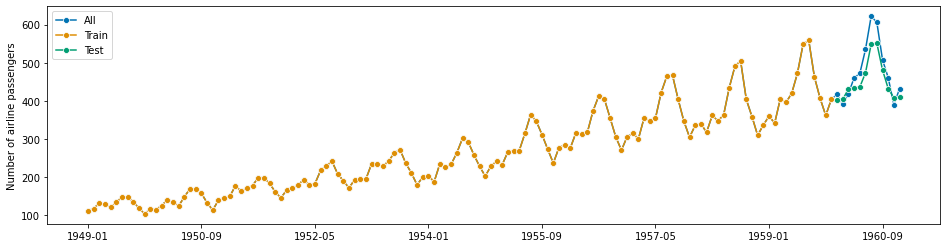

In [52]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = best_tuned_models.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [53]:
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='slidingwindow')

best_models = exp.compare_models(fold=fold, sort='smape', n_select=3)
best_models

,Model,smape,mape,mae,rmse,TT (Sec)
tbats,TBATS,0.0500,0.0492,20.4687,694.6917,25.7000
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.0547,0.0538,22.1884,843.2252,0.5800
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.0615,0.0594,24.6199,1130.5474,0.4433
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0621,0.0602,25.1004,1131.6690,0.0667
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.0652,0.0641,26.0520,1202.6687,0.1033
theta,Theta,0.0692,0.0664,27.9583,1250.5362,0.0167
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.0695,0.0673,27.9878,1451.3757,0.6167
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0696,0.0673,27.6795,1318.9902,0.0467
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.0722,0.0715,29.9189,1733.2135,0.0300
bats,BATS,0.0776,0.0757,30.8552,1561.6299,14.0233


[TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
       n_jobs=None, show_warnings=True, sp=12, use_arma_errors=True,
       use_box_cox=None, use_damped_trend=None, use_trend=None),
 BaseCdsDt(degree=1, deseasonal_model='additive',
           regressor=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                         criterion='mse', max_depth=None,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1, min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=100, n_jobs=-1,
                                         oob_score=False, random_state=8371,
           

## Error Handling

In [54]:
try:
    exp = TimeSeriesExperiment()
    exp.setup(data=y, fh=17, fold=76, fold_strategy='expandingwindow')
except ValueError as error:
    print(error)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:50:40
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Not Enough Data Points, set a lower number of folds or fh
